In [1]:
# Print Python and Conda versions
!python --version

Python 3.10.9


In [2]:
# Local path to data
DATA_DIR = '/projects/bachelor-thesis/data'
!ls $DATA_DIR

raw_data_32TNS_1C  raw_data_32TNS_2A


In [3]:
# Define and clear temp working directory
TMP_DIR = '/projects/bachelor-thesis/tmp'
!rm -rf $TMP_DIR
!mkdir -p $TMP_DIR

In [4]:
DATE = "20210710T101559"

# List corresponding files
!ls "$DATA_DIR/raw_data_32TNS_1C" | grep $DATE
!ls "$DATA_DIR/raw_data_32TNS_2A" | grep $DATE

!unzip "$DATA_DIR/raw_data_32TNS_1C/"$(ls "$DATA_DIR/raw_data_32TNS_1C" | grep $DATE) -d $TMP_DIR
!unzip "$DATA_DIR/raw_data_32TNS_2A/"$(ls "$DATA_DIR/raw_data_32TNS_2A" | grep $DATE) -d $TMP_DIR

S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.zip
S2B_MSIL2A_20210710T101559_N0301_R065_T32TNS_20210710T132321.zip
Archive:  /projects/bachelor-thesis/data/raw_data_32TNS_1C/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.zip
 extracting: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/MTD_MSIL1C.xml  
 extracting: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/INSPIRE.xml  
 extracting: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/manifest.safe  
   creating: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/AUX_DATA/
 extracting: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/GRANULE/L1C_T32TNS_A022685_20210710T102312/MTD_TL.xml  
 extracting: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_

In [6]:
BASE_PATH = f"{TMP_DIR}/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/GRANULE/L1C_T32TNS_A022685_20210710T102312/IMG_DATA"

B01 = "T32TNS_20210710T101559_B01.jp2"
B02 = "T32TNS_20210710T101559_B02.jp2"
B03 = "T32TNS_20210710T101559_B03.jp2"
B04 = "T32TNS_20210710T101559_B04.jp2"
B05 = "T32TNS_20210710T101559_B05.jp2"
B06 = "T32TNS_20210710T101559_B06.jp2"
B07 = "T32TNS_20210710T101559_B07.jp2"
B08 = "T32TNS_20210710T101559_B08.jp2"
B8A = "T32TNS_20210710T101559_B8A.jp2"
B09 = "T32TNS_20210710T101559_B09.jp2"
B10 = "T32TNS_20210710T101559_B10.jp2"
B11 = "T32TNS_20210710T101559_B11.jp2"
B12 = "T32TNS_20210710T101559_B12.jp2"
TCI = "T32TNS_20210710T101559_TCI.jp2"

bands_files = [B01, B02, B03, B04, B05, B06, B07, B08, B8A, B09, B10, B11, B12, TCI]
description = ["Coastal aerosol", "Blue", "Green", "Red", "Vegetation Red Edge 1", "Vegetation Red Edge 2",
               "Vegetation Red Edge 3", "NIR", "Vegetation Red Edge 4", "Water vapour", "SWIR - Cirrus",
               "SWIR 1", "SWIR 2", "True Color Image"]

In [7]:
import rasterio
from rasterio.plot import show

# Open the RGB image using rasterio
img = rasterio.open(f"{BASE_PATH}/{TCI}")
print("Number of bands = ", img.count)

Number of bands =  3


In [11]:
# Coordinate Reference System, which is the normal EPSG:32632 WGS 84 / UTM zone 32N
img.crs

CRS.from_epsg(32632)

In [12]:
# Some basic metadata
img.meta

{'driver': 'JP2OpenJPEG',
 'dtype': 'uint8',
 'nodata': None,
 'width': 10980,
 'height': 10980,
 'count': 3,
 'crs': CRS.from_epsg(32632),
 'transform': Affine(10.0, 0.0, 499980.0,
        0.0, -10.0, 5200020.0)}

In [10]:
# Geotransform
img.transform

Affine(10.0, 0.0, 499980.0,
       0.0, -10.0, 5200020.0)

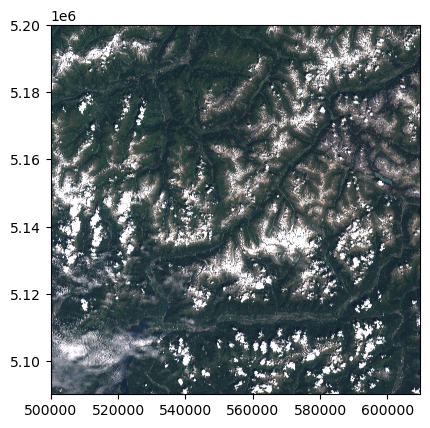

<AxesSubplot: >

In [11]:
# Plot the RGB image
show(img)

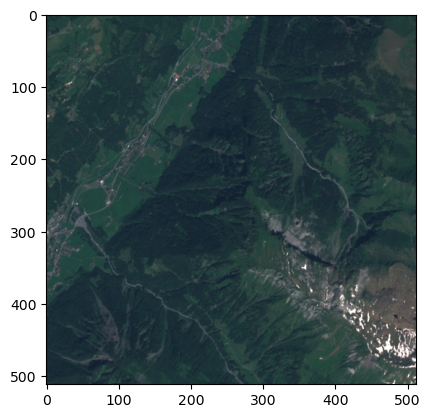

<AxesSubplot: >

In [12]:
from rasterio.windows import Window

# Plot the top left corner of the image (512x512 pixels)
show(img.read(window=Window(0, 0, 512, 512)))

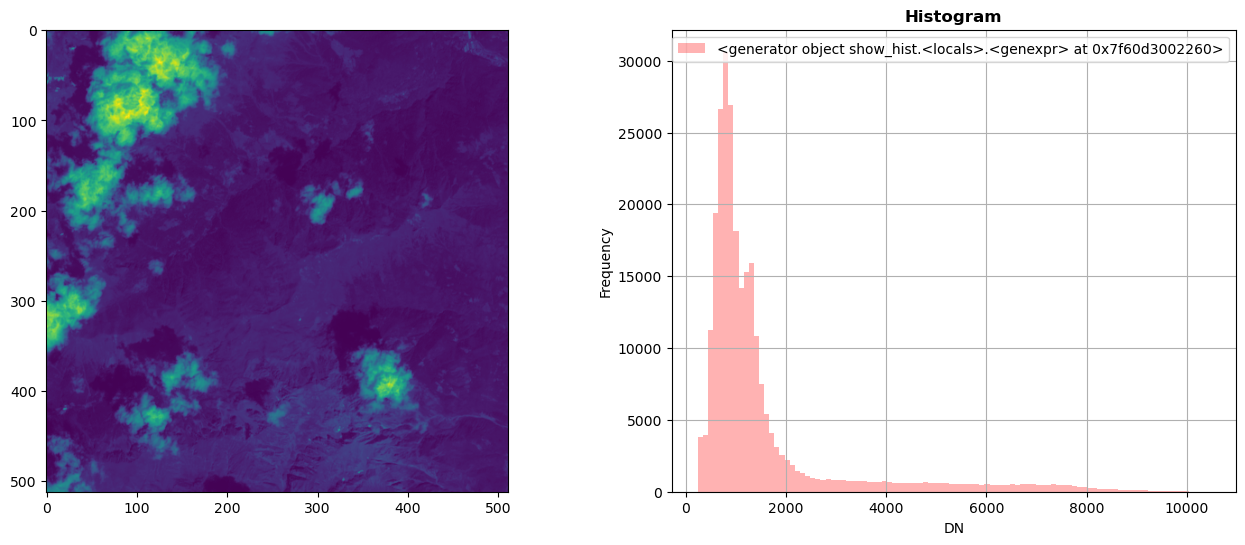

In [23]:
from matplotlib import pyplot as plt
import rasterio

(lon, lat) = (548696.7, 5150003.9)
IMG_SIZE = 512

py, px = img.index(lon, lat)
window = Window(px - IMG_SIZE // 2, py - IMG_SIZE // 2, IMG_SIZE, IMG_SIZE)

# Plot the window aside with the histogram
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
show(img.read(window=window), ax=ax[0])
rasterio.plot.show_hist(img.read(window=window), bins=100, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled',
                        ax=ax[1], title="Histogram")

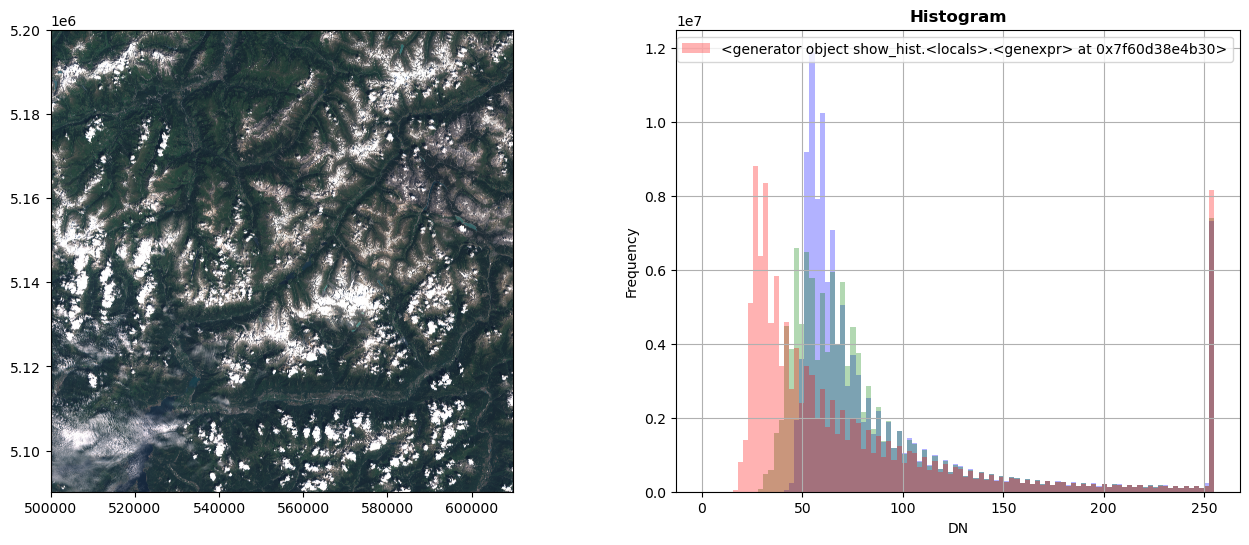

In [14]:
# Plot the window aside with the histogram
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
show(img, ax=ax[0])
rasterio.plot.show_hist(img, bins=100, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', ax=ax[1],
                        title="Histogram")

In [44]:
from matplotlib import pyplot as plt
import rasterio

# Open the bands
bands = [rasterio.open(f"{BASE_PATH}/{band}") for band in bands_files]

# add description to bands
for i, band in enumerate(bands):
    band.description = description[i]

| Sentinel-2 Bands              | Central Wavelength (µm) | Resolution (m) |
|-------------------------------|-------------------------|----------------|
| Band 1 - Coastal aerosol      | 0.443                   | 60             |
| Band 2 - Blue                 | 0.490                   | 10             |
| Band 3 - Green                | 0.560                   | 10             |
| Band 4 - Red                  | 0.665                   | 10             |
| Band 5 - Vegetation Red Edge  | 0.705                   | 20             |
| Band 6 - Vegetation Red Edge  | 0.740                   | 20             |
| Band 7 - Vegetation Red Edge  | 0.783                   | 20             |
| Band 8 - NIR                  | 0.842                   | 10             |
| Band 8A - Vegetation Red Edge | 0.865                   | 20             |
| Band 9 - Water vapour         | 0.945                   | 60             |
| Band 10 - SWIR - Cirrus       | 1.375                   | 60             |
| Band 11 - SWIR                | 1.610                   | 20             |
| Band 12 - SWIR                | 2.190                   | 20             |

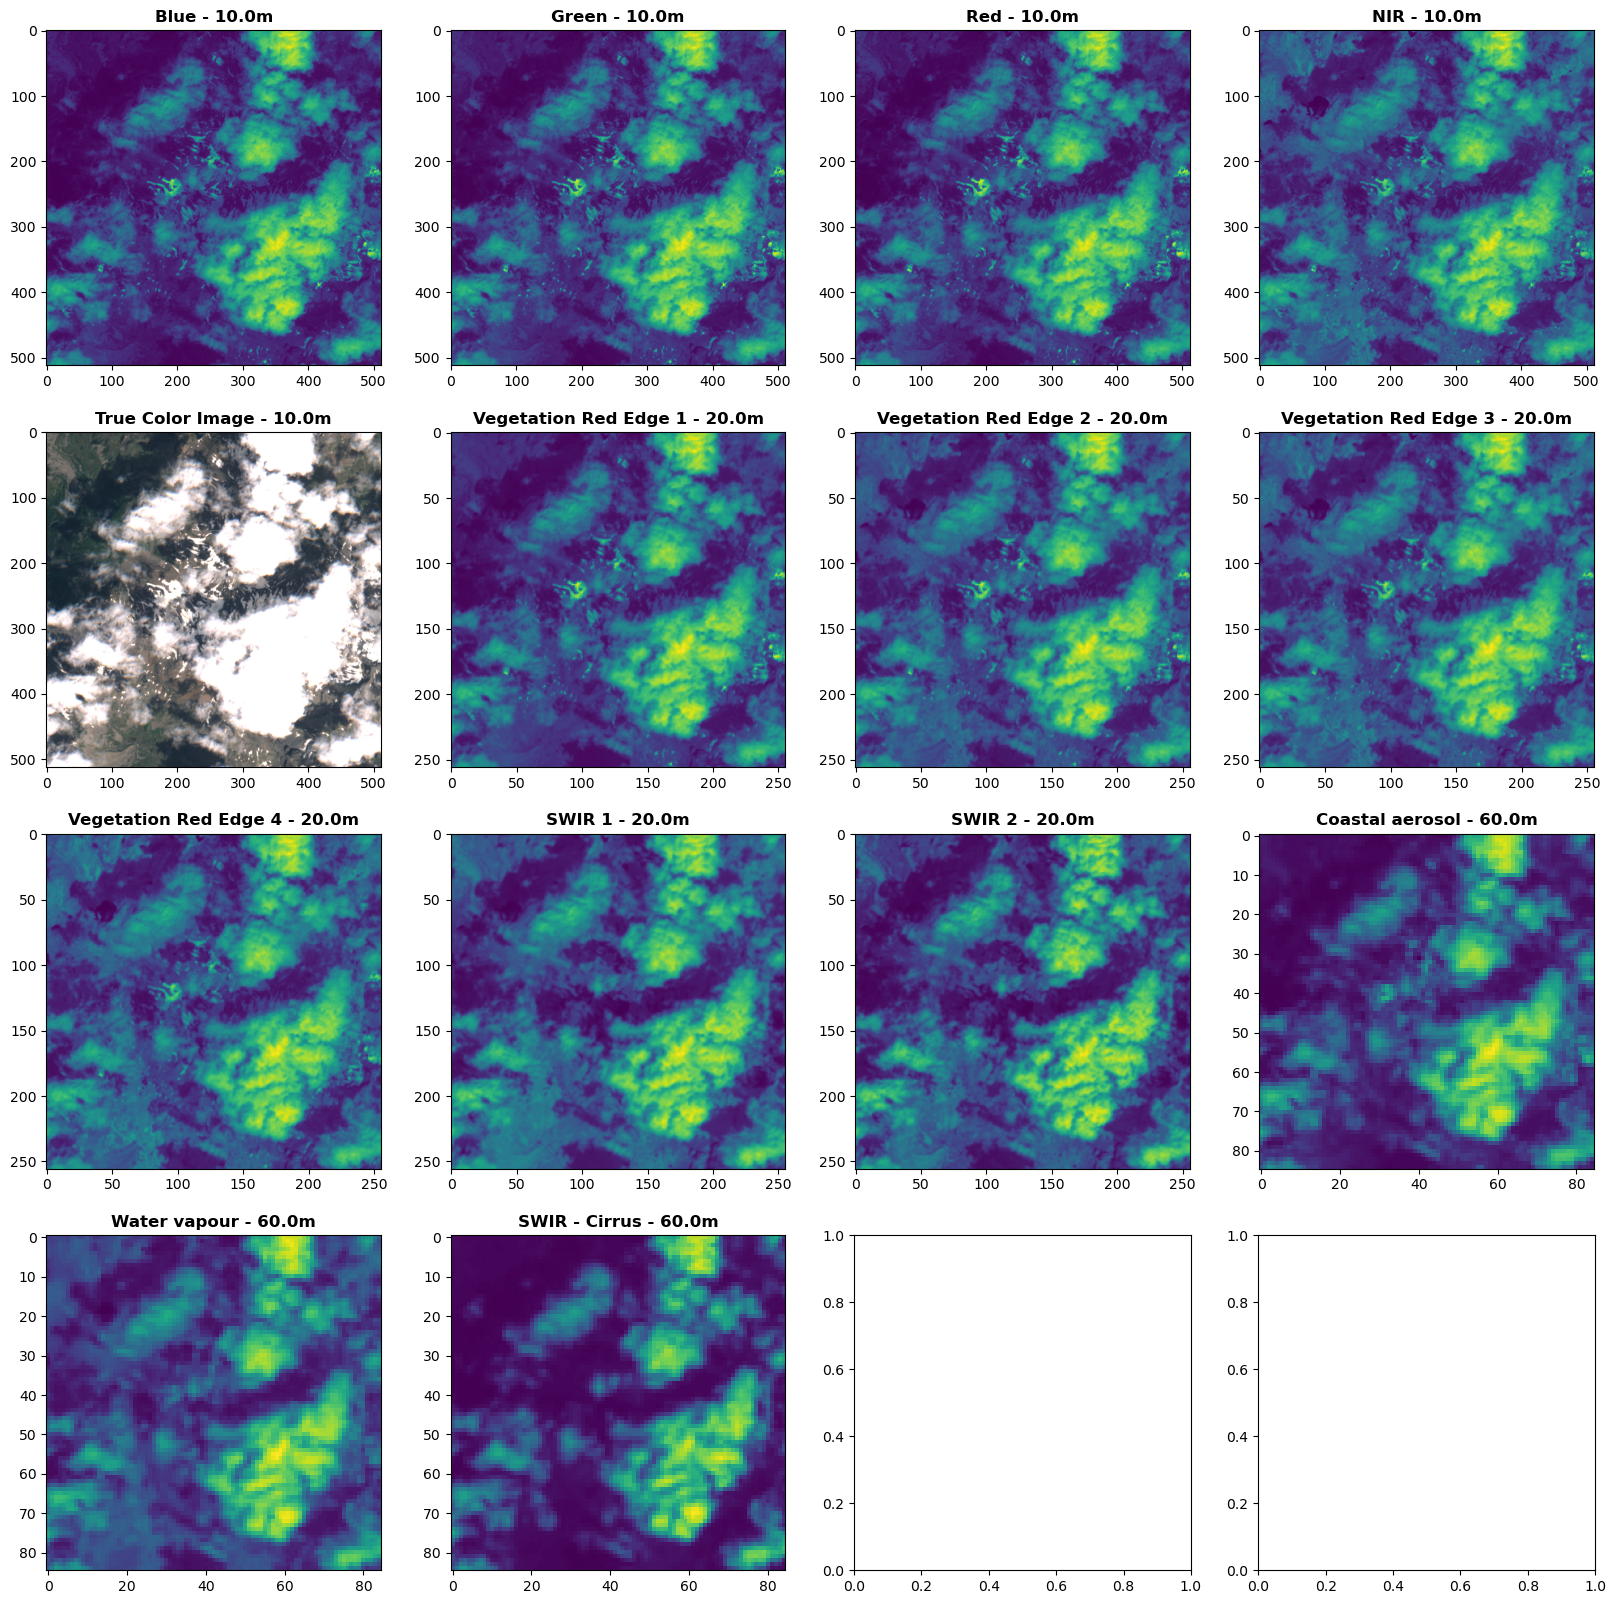

In [47]:
(lon, lat) = (589197.8,5138227.6)

BASE_RES = 10.0
IMG_SIZE = 512

# sort bands by resolution
bands = sorted(bands, key=lambda x: x.res[0])

# Plot all the bands 13 bands in a 4x4 grid
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
for i in range(4):
    for j in range(4):
        if i * 4 + j < len(bands):
            img = bands[i * 4 + j]

            adjusted_img_size = int(IMG_SIZE * BASE_RES / img.res[0])

            py, px = img.index(lon, lat)
            window = Window(px - adjusted_img_size // 2, py - adjusted_img_size // 2, adjusted_img_size, adjusted_img_size)

            show(img.read(window=window), ax=ax[i, j], title=f"{img.description} - {img.res[0]}m")

In [14]:
import numpy as np

# Use s2cloudless to mask clouds
s2_bands = [B01, B02, B04, B05, B08, B8A, B09, B10, B11, B12]
s2_bands = [f"{BASE_PATH}/{band}" for band in s2_bands]

# load the bands
bands = [rasterio.open(band) for band in s2_bands]

# Downscale all bands to 60m resolution
bands = [band.read(1, out_shape=(int(band.height * band.res[0] / 60), int(band.width * band.res[1] / 60))) for band in bands]

# Stack the bands
bands = np.dstack(bands)

In [19]:
bands.shape

(1830, 1830, 10)

<Axes: title={'center': 'B09'}>

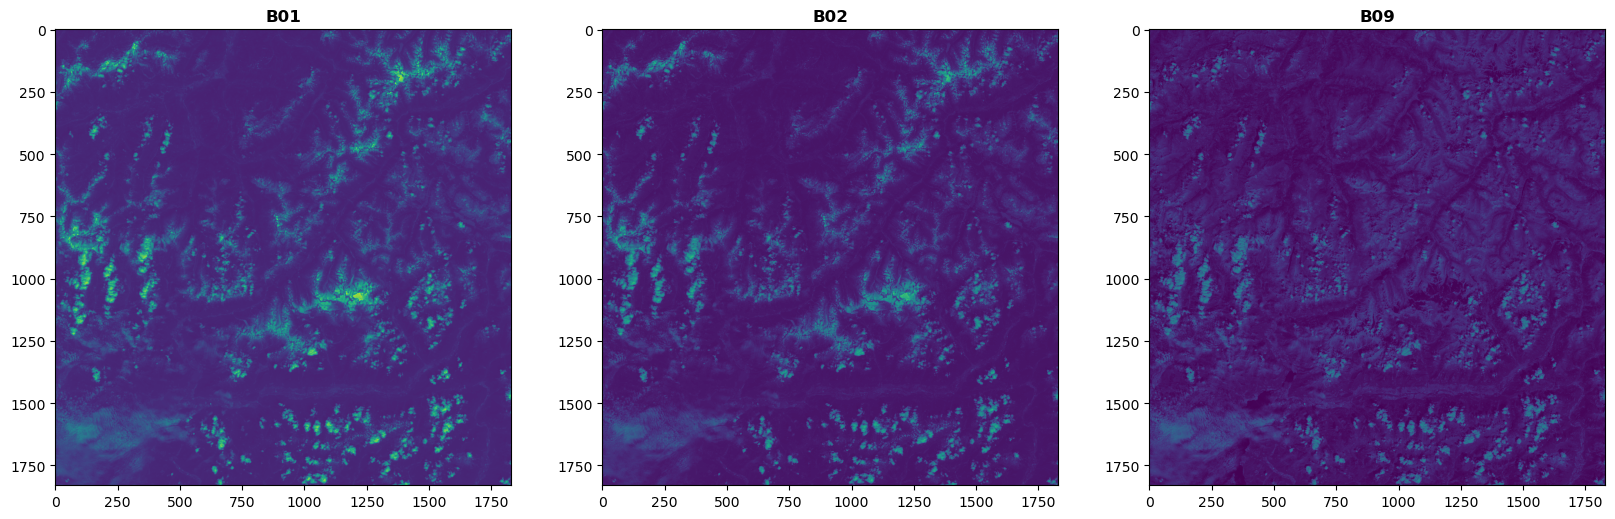

In [35]:
# Show three bands
fig, ax = plt.subplots(1, 3, figsize=(20, 20))
show(bands[:, :, 0], ax=ax[0], title="B01")
show(bands[:, :, 1], ax=ax[1], title="B02")
show(bands[:, :, 9], ax=ax[2], title="B09")

In [36]:
from s2cloudless import S2PixelCloudDetector

cloud_detector = S2PixelCloudDetector(threshold=0.4, average_over=4, dilation_size=2, all_bands=False)

In [39]:
%%time

probability_maps = cloud_detector.get_cloud_probability_maps(bands)

CPU times: user 1min 18s, sys: 72.2 ms, total: 1min 18s
Wall time: 5.47 s


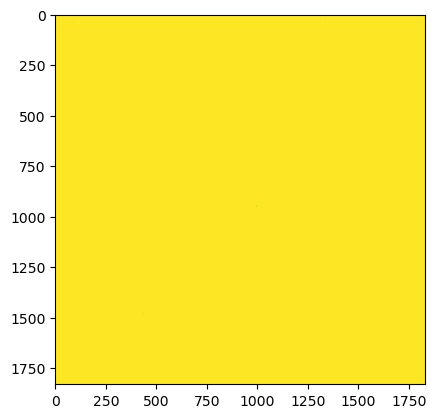

In [41]:
import matplotlib.pyplot as plt

plt.imshow(probability_maps)

In [42]:
# Source: https://github.com/sentinel-hub/sentinel2-cloud-detector/issues/1#issuecomment-364801496

from s2cloudless import S2PixelCloudDetector
import numpy as np
import rasterio
from rasterio.warp import reproject, Resampling



with rasterio.open(f"{BASE_PATH}/{B01}") as scl:
    B01=scl.read()
    tmparr = np.empty_like(B01)
    aff = scl.transform
    print(B01.shape)

with rasterio.open(f"{BASE_PATH}/{B02}") as scl:
    B02=scl.read()
    reproject(
        B02, tmparr,
        src_transform = scl.transform,
        dst_transform = aff,
        src_crs = scl.crs,
        dst_crs = scl.crs,
        resampling = Resampling.bilinear)
    B02 = tmparr
    print(B02.shape)

with rasterio.open(f"{BASE_PATH}/{B04}") as scl:
    B04=scl.read()
    reproject(
        B04, tmparr,
        src_transform = scl.transform,
        dst_transform = aff,
        src_crs = scl.crs,
        dst_crs = scl.crs,
        resampling = Resampling.bilinear)
    B04 = tmparr
    print(B04.shape)
with rasterio.open(f"{BASE_PATH}/{B05}") as scl:
    B05=scl.read()
    reproject(
        B05, tmparr,
        src_transform = scl.transform,
        dst_transform = aff,
        src_crs = scl.crs,
        dst_crs = scl.crs,
        resampling = Resampling.bilinear)
    B05 = tmparr
    print(B05.shape)
with rasterio.open(f"{BASE_PATH}/{B08}") as scl:
    B08=scl.read()
    reproject(
        B08, tmparr,
        src_transform = scl.transform,
        dst_transform = aff,
        src_crs = scl.crs,
        dst_crs = scl.crs,
        resampling = Resampling.bilinear)
    B08 = tmparr
    print(B08.shape)

with rasterio.open(f"{BASE_PATH}/{B8A}") as scl:
    B8A=scl.read()
    reproject(
        B8A, tmparr,
        src_transform = scl.transform,
        dst_transform = aff,
        src_crs = scl.crs,
        dst_crs = scl.crs,
        resampling = Resampling.bilinear)
    B8A = tmparr
    print(B8A.shape)
with rasterio.open(f"{BASE_PATH}/{B09}") as scl:
    B09=scl.read()
with rasterio.open(f"{BASE_PATH}/{B10}") as scl:
    B10=scl.read()
with rasterio.open(f"{BASE_PATH}/{B11}") as scl:
    B11=scl.read()
    reproject(
        B11, tmparr,
        src_transform = scl.transform,
        dst_transform = aff,
        src_crs = scl.crs,
        dst_crs = scl.crs,
        resampling = Resampling.bilinear)
    B11 = tmparr
    print(B11.shape)
with rasterio.open(f"{BASE_PATH}/{B12}") as scl:
    B12=scl.read()
    reproject(
        B12, tmparr,
        src_transform = scl.transform,
        dst_transform = aff,
        src_crs = scl.crs,
        dst_crs = scl.crs,
        resampling = Resampling.bilinear)
    B12 = tmparr
    print(B12.shape)

print(B12.shape)
bands = np.array([np.dstack((B01[0]/10000.0,B02[0]/10000.0,B04[0]/10000.0,B05[0]/10000.0,B08[0]/10000.0,B8A[0]/10000.0,B09[0]/10000.0,B10[0]/10000.0,B11[0]/10000.0,B12[0]/10000.0))])
print(bands.shape)
cloud_detector = S2PixelCloudDetector(threshold=0.4, average_over=4, dilation_size=2)
cloud_probs = cloud_detector.get_cloud_probability_maps(bands)
mask = cloud_detector.get_cloud_masks(bands).astype(rasterio.uint8)


(1, 1830, 1830)
(1, 1830, 1830)
(1, 1830, 1830)
(1, 1830, 1830)
(1, 1830, 1830)
(1, 1830, 1830)
(1, 1830, 1830)
(1, 1830, 1830)
(1, 1830, 1830)
(1, 1830, 1830, 10)


RasterioIOError: Attempt to create new tiff file '/data/test/clouds.tif' failed: No such file or directory

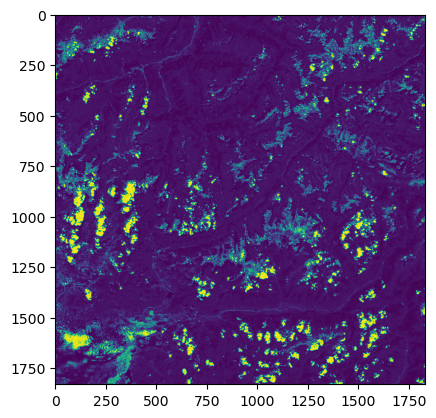

In [44]:
plt.imshow(cloud_probs[0])